# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from config import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

616

## Perform API Calls

In [3]:
# Starting URL for Weather Map API Call
#url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f2e7be3fbf6a6ca5ee22f83c7998246c"

# List of city data
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "&q=" + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out the max temp, humidity, and cloudiness
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")
        
        

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | ihosy
Processing Record 2 of Set 1 | darhan
Processing Record 3 of Set 1 | mar del plata
Processing Record 4 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record 5 of Set 1 | bluff
Processing Record 6 of Set 1 | mataura
Processing Record 7 of Set 1 | luau
Processing Record 8 of Set 1 | hilo
Processing Record 9 of Set 1 | ponta do sol
Processing Record 10 of Set 1 | hobart
Processing Record 11 of Set 1 | salalah
Processing Record 12 of Set 1 | bengkulu
Processing Record 13 of Set 1 | busselton
Processing Record 14 of Set 1 | ostrovnoy
Processing Record 15 of Set 1 | marsa matruh
Processing Record 16 of Set 1 | sitka
Processing Record 17 of Set 1 | severo-kurilsk
Processing Record 18 of Set 1 | punta arenas
Processing Record 19 of Set 1 | bredasdorp
Processing Record 20 of Set 1 | nanortalik
Processing Record 21 of Set 1 | kosikha
Processing Record 22 of Set 1 | ribeira grande


Processing Record 34 of Set 4 | enid
Processing Record 35 of Set 4 | nanning
Processing Record 36 of Set 4 | nuuk
Processing Record 37 of Set 4 | pangkalanbuun
Processing Record 38 of Set 4 | bargal
City not found. Skipping...
Processing Record 39 of Set 4 | atar
Processing Record 40 of Set 4 | mahebourg
Processing Record 41 of Set 4 | urucara
Processing Record 42 of Set 4 | azare
Processing Record 43 of Set 4 | baker city
Processing Record 44 of Set 4 | randolph
Processing Record 45 of Set 4 | gazanjyk
Processing Record 46 of Set 4 | port alfred
Processing Record 47 of Set 4 | prainha
Processing Record 48 of Set 4 | gilbues
Processing Record 49 of Set 4 | sinnamary
Processing Record 0 of Set 5 | zeya
Processing Record 1 of Set 5 | chake chake
Processing Record 2 of Set 5 | faanui
Processing Record 3 of Set 5 | golden gate
Processing Record 4 of Set 5 | tuatapere
Processing Record 5 of Set 5 | clyde river
Processing Record 6 of Set 5 | namibe
Processing Record 7 of Set 5 | puerto ayacu

Processing Record 28 of Set 8 | mount gambier
Processing Record 29 of Set 8 | sangar
Processing Record 30 of Set 8 | misratah
Processing Record 31 of Set 8 | narragansett
Processing Record 32 of Set 8 | elizabeth city
Processing Record 33 of Set 8 | yanan
City not found. Skipping...
Processing Record 34 of Set 8 | tawang
Processing Record 35 of Set 8 | atbasar
Processing Record 36 of Set 8 | attawapiskat
City not found. Skipping...
Processing Record 37 of Set 8 | barpathar
Processing Record 38 of Set 8 | mahabaleshwar
Processing Record 39 of Set 8 | olga
Processing Record 40 of Set 8 | mys shmidta
City not found. Skipping...
Processing Record 41 of Set 8 | malakal
Processing Record 42 of Set 8 | bida
Processing Record 43 of Set 8 | coaraci
Processing Record 44 of Set 8 | miramar
Processing Record 45 of Set 8 | anchorage
Processing Record 46 of Set 8 | salym
Processing Record 47 of Set 8 | inongo
Processing Record 48 of Set 8 | vaitupu
City not found. Skipping...
Processing Record 49 of

Processing Record 17 of Set 12 | crixas
Processing Record 18 of Set 12 | sao jose do belmonte
Processing Record 19 of Set 12 | novouzensk
Processing Record 20 of Set 12 | muros
Processing Record 21 of Set 12 | tilichiki
Processing Record 22 of Set 12 | pinhao
Processing Record 23 of Set 12 | vila
Processing Record 24 of Set 12 | koksovyy
Processing Record 25 of Set 12 | chekhov
Processing Record 26 of Set 12 | saint-joseph
Processing Record 27 of Set 12 | beruni
City not found. Skipping...
Processing Record 28 of Set 12 | inirida
Processing Record 29 of Set 12 | kolokani
Processing Record 30 of Set 12 | omsukchan
Processing Record 31 of Set 12 | fez
Processing Record 32 of Set 12 | bara
Processing Record 33 of Set 12 | lengshuijiang
Processing Record 34 of Set 12 | danshui
Processing Record 35 of Set 12 | dasoguz
Processing Record 36 of Set 12 | meulaboh
Processing Record 37 of Set 12 | mayo
Processing Record 38 of Set 12 | strezhevoy
Processing Record 39 of Set 12 | serik
Processing R

In [4]:
# Convert array of JSONs into Pandas DataFrame
city_data_pd = pd.DataFrame(city_data)

# Show Record Count
city_data_pd.count()

City          565
Lat           565
Lng           565
Max Temp      565
Humidity      565
Cloudiness    565
Wind Speed    565
Country       565
Date          565
dtype: int64

In [5]:
# Display the City Data Frame
city_data_pd.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,ihosy,-22.40,46.12,77.27,43,91,5.77,MG,1605815127
1,darhan,49.49,105.92,13.19,88,94,4.88,MN,1605815127
2,mar del plata,-38.00,-57.56,62.60,72,0,11.41,AR,1605815128
3,bluff,-46.60,168.33,55.99,92,100,5.99,NZ,1605815128
4,mataura,-46.19,168.86,55.99,92,100,5.99,NZ,1605815128


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [6]:
city_data_pd.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,565.000000,565.000000,565.000000,565.000000,565.000000,565.000000,5.650000e+02
mean,20.115044,19.423947,55.870920,72.175221,51.548673,8.551027,1.605815e+09
std,32.867417,89.779890,25.577466,21.060520,41.156937,6.358100,5.580936e+01
min,-54.800000,-175.200000,-22.410000,1.000000,0.000000,0.220000,1.605815e+09
25%,-6.870000,-57.750000,38.620000,59.000000,1.000000,3.960000,1.605815e+09
50%,25.500000,21.290000,63.610000,78.000000,59.000000,6.930000,1.605815e+09
75%,46.620000,100.200000,77.000000,88.000000,93.000000,11.410000,1.605815e+09
max,78.220000,178.420000,96.800000,100.000000,100.000000,48.320000,1.605815e+09


In [7]:
#  Get the indices of cities that have humidity over 100%.
dirty_city_data = city_data_pd[(city_data_pd["Humidity"] > 100)].index
                                  
dirty_city_data

Int64Index([], dtype='int64')

In [8]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
clean_city_data = city_data_pd.drop(dirty_city_data, inplace=False)
clean_city_data.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,ihosy,-22.40,46.12,77.27,43,91,5.77,MG,1605815127
1,darhan,49.49,105.92,13.19,88,94,4.88,MN,1605815127
2,mar del plata,-38.00,-57.56,62.60,72,0,11.41,AR,1605815128
3,bluff,-46.60,168.33,55.99,92,100,5.99,NZ,1605815128
4,mataura,-46.19,168.86,55.99,92,100,5.99,NZ,1605815128


In [9]:
# Extract relevant fields from the data frame
lats = clean_city_data["Lat"]
max_temps = clean_city_data["Max Temp"]
humidity = clean_city_data["Humidity"]
cloudiness = clean_city_data["Cloudiness"]
wind_speed = clean_city_data["Wind Speed"]

# Export the City_Data into a csv
clean_city_data.to_csv(output_data_file, index_label="City_ID")

## Latitude vs. Temperature Plot

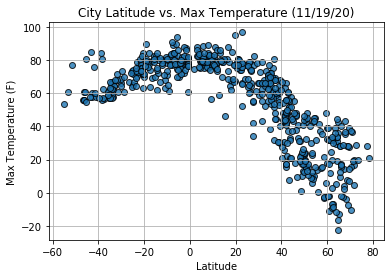

In [11]:
# Build scatter plot for latitude vs. temperature
plt.scatter(lats, 
            max_temps,
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature (%s)" % time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output/Fig1.png")

# Show plot
plt.show()

## Latitude vs. Humidity Plot

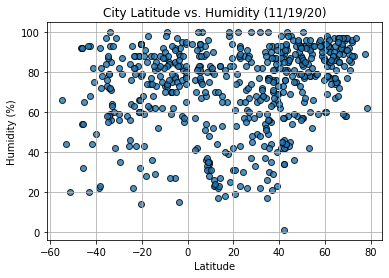

In [12]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(lats, 
            humidity,
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (%s)" % time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output/Fig2.png")

# Show plot
plt.show()

## Latitude vs. Cloudiness Plot

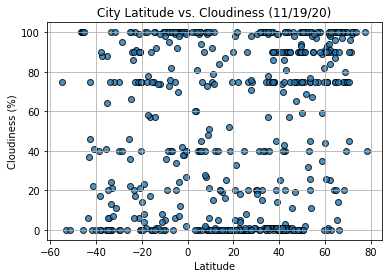

In [13]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(lats, 
            cloudiness,
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (%s)" % time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output/Fig3.png")

# Show plot
plt.show()

## Latitude vs. Wind Speed Plot

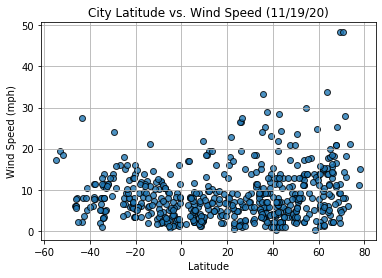

In [14]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(lats, 
            wind_speed,
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (%s)" % time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output/Fig4.png")

# Show plot
plt.show()

## Linear Regression

In [15]:
# Create a function to create Linear Regression plots
def plot_linear_regression(x_values, y_values, title, text_coordinates):
    
    # Run regresson on southern hemisphere
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    # Plot
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,text_coordinates,fontsize=15,color="red")
    plt.xlabel('Latitude')
    plt.ylabel(title)
    print(f"The r-value is: {rvalue**2}")
    plt.show()

In [16]:
# Create Northern and Southern Hemisphere DataFrames
northern_hemi_df = city_data_pd.loc[(city_data_pd["Lat"] >= 0)]
southern_hemi_df = city_data_pd.loc[(city_data_pd["Lat"] < 0)]

###  Max Temp vs. Latitude Linear Regression

The r-value is: 0.7181997285660311


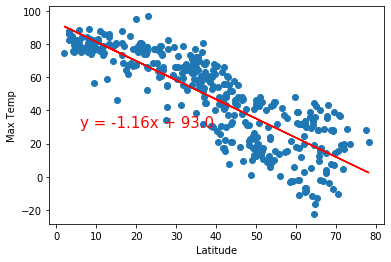

In [17]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
plot_linear_regression(x_values, y_values, 'Max Temp',(6,30))

The r-value is: 0.44631859974140864


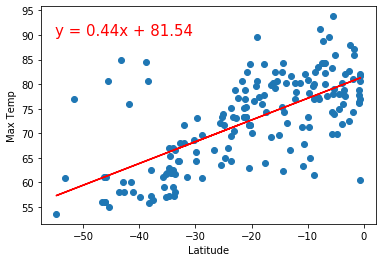

In [18]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
plot_linear_regression(x_values, y_values, 'Max Temp', (-55, 90))

The high r value indicates a strong positive correlation between latitude and max temperature. R values ~ 0.5 indicate that there is a moderate positive correlation. 

### Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.12391207543057174


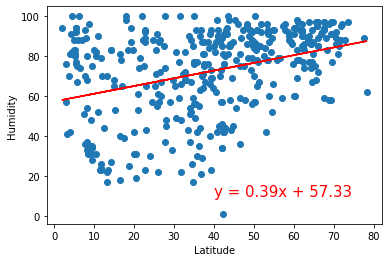

In [19]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
plot_linear_regression(x_values, y_values, 'Humidity',(40,10))

The r-value is: 0.043882023577131495


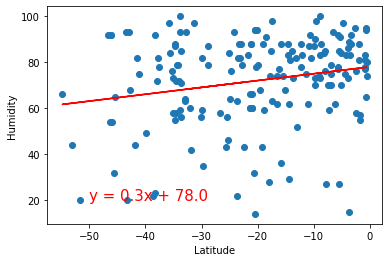

In [20]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
plot_linear_regression(x_values, y_values, 'Humidity', (-50, 20))

The low r values indicate a weak to no relationship between humidity and latitude.

### Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.1032835775793765


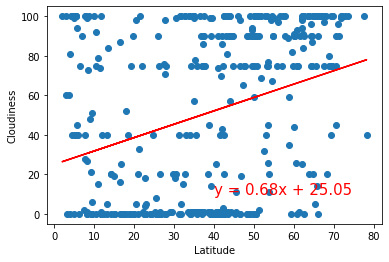

In [21]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
plot_linear_regression(x_values, y_values, 'Cloudiness', (40,10))

The r-value is: 0.05646594767541083


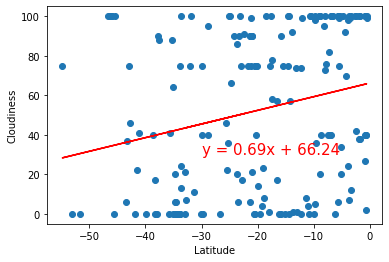

In [22]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
plot_linear_regression(x_values, y_values, 'Cloudiness', (-30,30))

The low r values indicate a weak positive relationship between latitude and cloudiness.

### Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.05400408352808374


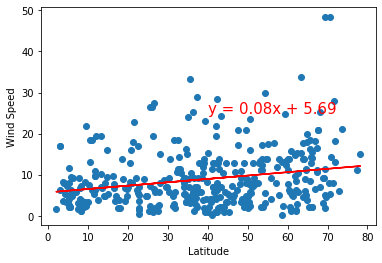

In [23]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
plot_linear_regression(x_values, y_values, 'Wind Speed', (40,25))

The r-value is: 0.07285903253844059


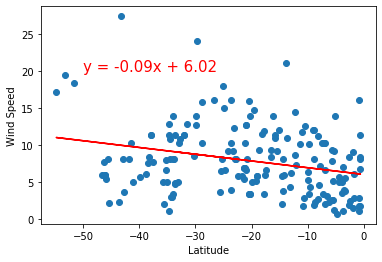

In [24]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
plot_linear_regression(x_values, y_values, 'Wind Speed', (-50, 20))

The low r values indicate that there is no real relationship between wind speed and latitude." The difference between the hemispheres doesn't seem to be significant enough to comment upon.